In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10
squidpy==1.2.3


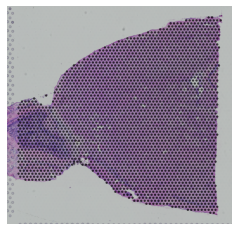

In [2]:
adata_st = sc.datasets.visium_sge(sample_id='V1_Mouse_Brain_Sagittal_Anterior', include_hires_tiff=False)
sc.pl.spatial(adata_st, alpha=0.7, frameon=False, show=True)

In [3]:
sc.pp.highly_variable_genes(adata_st, n_top_genes=2000, flavor="seurat_v3")
sc.pp.normalize_total(adata_st)
sc.pp.log1p(adata_st)

In [4]:
adata_st

AnnData object with n_obs × n_vars = 2695 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'

In [72]:
adata_st

AnnData object with n_obs × n_vars = 2695 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'

In [23]:
ad_sc = sc.read_h5ad("/mnt/disk1/xiaojk/data/mousebrain/mousebrain_genescore_matrix(21808.8055).h5ad")

In [24]:
ad_sc.obs

,orig.ident,nCount_RNA,nFeature_RNA,celltype
09A_CAGCCCCGCCTT,0,2444.0,2034,L2/3 IT
09A_CGCCTACCATGA,0,4099.0,3061,L5 PT
09A_GATGCGCGGCTA,0,2925.0,2415,Astro
09A_GGTCCGAGTCCT,0,2481.0,2049,L6 IT
09A_TCTCCCGGCACC,0,2053.0,1737,L5 PT
...,...,...,...,...
09L_AATGAGTCGTTC,11,3177.0,2535,L5 PT
09L_ATTGTGAGGGGG,11,445.0,434,L2/3 IT
09L_CCTGCCGAGACG,11,2609.0,2048,L6 IT.2
09L_GCCCAGCAGCCA,11,389.0,375,L4


In [25]:
ad_sc1 = sc.read_h5ad("/mnt/disk1/xzhou/code/pycharm_project/GLUE-master/data/download/Chen-2019/Chen-2019-ATAC.h5ad")

In [26]:
ad_sc1.obs

,domain,cell_type
cells,,
09L_GTAAACCCGATA_ATAC,scATAC-seq,E2Rasgrf2
09D_GCCGGGCGGCCG_ATAC,scATAC-seq,E4Thsd7a
09J_TAGGCCTGAATT_ATAC,scATAC-seq,E2Rasgrf2
09C_TCCGGCATCTCA_ATAC,scATAC-seq,E6Tle4
09C_AGGCCACGTACA_ATAC,scATAC-seq,E2Rasgrf2
...,...,...
09H_GTTTACCTAGTT_ATAC,scATAC-seq,InP
09F_TAGTTGGCAGAT_ATAC,scATAC-seq,E3Rorb
09L_CTTAGACGTCTA_ATAC,scATAC-seq,E6Tle4


In [27]:
ad_sc1.obs_names = [name.replace("_ATAC", "") for name in ad_sc1.obs_names]
ad_sc1.obs

,domain,cell_type
09L_GTAAACCCGATA,scATAC-seq,E2Rasgrf2
09D_GCCGGGCGGCCG,scATAC-seq,E4Thsd7a
09J_TAGGCCTGAATT,scATAC-seq,E2Rasgrf2
09C_TCCGGCATCTCA,scATAC-seq,E6Tle4
09C_AGGCCACGTACA,scATAC-seq,E2Rasgrf2
...,...,...
09H_GTTTACCTAGTT,scATAC-seq,InP
09F_TAGTTGGCAGAT,scATAC-seq,E3Rorb
09L_CTTAGACGTCTA,scATAC-seq,E6Tle4
09C_GATGTAATTTGA,scATAC-seq,InV


In [28]:
import pandas as pd
import anndata as ad

# 假设 ad_sc1 和 ad_sc 是两个 Anndata 结构
# 获取 ad_sc1 和 ad_sc 的 obs_names
obs_names_ad_sc1 = ad_sc1.obs_names
obs_names_ad_sc = ad_sc.obs_names

# 找到匹配的观测值
matching_obs = set(obs_names_ad_sc1).intersection(obs_names_ad_sc)

# 输出匹配到的数据总数量
print("匹配到的数据总数量：", len(matching_obs))

# 找到未匹配到的观测行的索引
rows_to_drop = [i for i, obs_name in enumerate(ad_sc.obs_names) if obs_name not in matching_obs]

# 删除未匹配到的观测行，并更新维度
ad_sc = ad_sc[ad_sc.obs_names.isin(matching_obs)].copy()

# 遍历匹配的观测值，将 cell_type 赋值给 ad_sc
for obs_name in matching_obs:
    cell_type = ad_sc1.obs.loc[obs_name, 'cell_type']
    ad_sc.obs.loc[obs_name, 'celltype'] = cell_type

# 确保更新后的 celltype 列已经被赋值到 ad_sc
print(ad_sc.obs['celltype'])


匹配到的数据总数量： 7339
09A_CAGCCCCGCCTT        E3Rorb
09A_CGCCTACCATGA       E5Parm1
09A_GATGCGCGGCTA           Ast
09A_GGTCCGAGTCCT    E4Il1rapl2
09A_TCTCCCGGCACC       E5Parm1
                       ...    
09L_ACTATTATGATT        E6Tle4
09L_GTGCGGAGGGCG          Clau
09L_CCTGCCGAGACG          Clau
09L_GCCCAGCAGCCA     E2Rasgrf2
09L_AGCGCTATCCCC           InP
Name: celltype, Length: 7339, dtype: object


In [29]:
ad_sc

AnnData object with n_obs × n_vars = 7339 × 21808
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype'
    var: 'features'

In [30]:
len(list(ad_sc1.obs['cell_type'].unique()))

22

In [31]:
len(list(ad_sc.obs['celltype'].unique()))

22

In [32]:
np.unique(ad_sc.X.toarray()[0, :])

array([0.        , 0.38896308, 0.66829089, 0.88638817, 1.06533135,
       1.21706189, 1.34877433])

In [33]:
ad_sc.obs.celltype.value_counts()

celltype
E2Rasgrf2     1938
E3Rorb        1164
E6Tle4         975
E4Il1rapl2     567
E5Galnt14      466
E4Thsd7a       439
E5Parm1        329
E3Rmst         226
InP            215
InS            170
Ast            164
E5Sulf1        151
Clau           114
OliM           106
InV             88
E5Tshz2         68
InN             65
Mic             35
OPC             18
Peri            14
Endo            14
OliI            13
Name: count, dtype: int64

In [34]:
sc.pp.normalize_total(ad_sc)

In [35]:
ad_sc.obs['subclass_label'] = ad_sc.obs.celltype

In [36]:
ad_sp1.var

,gene_ids,feature_types,genome,MT,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
Xkr4,ENSMUSG00000051951,Gene Expression,mm10,False,103,0.038831,0.038097,96.330602,109.0,4.700480,103,False,NaN,0.038929,0.042428,0.977155
Gm19938,ENSMUSG00000102331,Gene Expression,mm10,False,173,0.071607,0.069159,93.836836,201.0,5.308268,173,True,2117.0,0.071786,0.089522,1.104345
Sox17,ENSMUSG00000025902,Gene Expression,mm10,False,205,0.080513,0.077436,92.696829,226.0,5.424950,205,True,3639.0,0.080714,0.093519,1.025226
Mrpl15,ENSMUSG00000033845,Gene Expression,mm10,False,1293,0.682223,0.520116,53.936587,1915.0,7.557995,1293,False,NaN,0.683929,0.830038,0.937183
Lypla1,ENSMUSG00000025903,Gene Expression,mm10,False,851,0.388315,0.328091,69.682936,1090.0,6.994850,851,False,NaN,0.389286,0.448617,0.960084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spry3,ENSMUSG00000061654,Gene Expression,mm10,False,228,0.087994,0.084336,91.877449,247.0,5.513429,228,False,NaN,0.088214,0.094752,0.949990
Tmlhe,ENSMUSG00000079834,Gene Expression,mm10,False,71,0.026006,0.025674,97.470609,73.0,4.304065,71,False,NaN,0.026071,0.026830,0.936064
4933409K07Rik,ENSMUSG00000095552,Gene Expression,mm10,False,19,0.006769,0.006746,99.323121,19.0,2.995732,19,False,NaN,0.006786,0.006742,0.935659
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,mm10,False,29,0.010331,0.010278,98.966869,29.0,3.401197,29,False,NaN,0.010357,0.010254,0.918078


In [38]:
ad_sc.obs.subclass_label.value_counts()

subclass_label
E2Rasgrf2     1938
E3Rorb        1164
E6Tle4         975
E4Il1rapl2     567
E5Galnt14      466
E4Thsd7a       439
E5Parm1        329
E3Rmst         226
InP            215
InS            170
Ast            164
E5Sulf1        151
Clau           114
OliM           106
InV             88
E5Tshz2         68
InN             65
Mic             35
OPC             18
Peri            14
Endo            14
OliI            13
Name: count, dtype: int64

In [42]:
adata_sc = ad_sc.copy()
adata_sc

AnnData object with n_obs × n_vars = 7339 × 21808
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'subclass_label'
    var: 'features'

In [43]:
sc.tl.rank_genes_groups(adata_sc, groupby="subclass_label", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

1634

In [44]:
adata_sc.X.min()

0.0

In [73]:
tg.pp_adatas(adata_sc, adata_st, genes=markers)

INFO:root:1560 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:16059 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [74]:
assert adata_sc.uns['training_genes'] == adata_st.uns['training_genes']

In [75]:
ad_map = tg.map_cells_to_space(adata_sc, adata_st,
    mode="cells",
#     mode="clusters",
#     cluster_label='cell_subclass',  # .obs field w cell types
    density_prior='rna_count_based',
    num_epochs=500,
    device="cuda:0",
#     device='cpu',
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1560 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.562, KL reg: 0.014
Score: 0.707, KL reg: 0.000
Score: 0.714, KL reg: 0.000
Score: 0.716, KL reg: 0.000
Score: 0.717, KL reg: 0.000


INFO:root:Saving results..


In [76]:
ad_map

AnnData object with n_obs × n_vars = 7339 × 2695
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'subclass_label'
    var: 'in_tissue', 'array_row', 'array_col', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [77]:
def construct_obs_plot(df_plot, adata, perc=0, suffix=None):
    # clip
    df_plot = df_plot.clip(df_plot.quantile(perc), df_plot.quantile(1 - perc), axis=1)

    # normalize
    df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

    if suffix:
        df_plot = df_plot.add_suffix(" ({})".format(suffix))
    adata.obs = pd.concat([adata.obs, df_plot], axis=1)
    
    
def plot_cell_annotation_sc(
    adata_sp, 
    annotation_list, 
    x="x", 
    y="y", 
    spot_size=None, 
    scale_factor=None, 
    perc=0,
    alpha_img=1.0,
    bw=False,
    ax=None
):
        
    # remove previous df_plot in obs
    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

    # construct df_plot
    df = adata_sp.obsm["tangram_ct_pred"][annotation_list]
    construct_obs_plot(df, adata_sp, perc=perc)
    
    #non visium data 
    if 'spatial' not in adata_sp.obsm.keys():
        #add spatial coordinates to obsm of spatial data 
        coords = [[x,y] for x,y in zip(adata_sp.obs[x].values,adata_sp.obs[y].values)]
        adata_sp.obsm['spatial'] = np.array(coords)
    
    if 'spatial' not in adata_sp.uns.keys() and spot_size == None and scale_factor == None:
        raise ValueError("Spot Size and Scale Factor cannot be None when ad_sp.uns['spatial'] does not exist")
    
    #REVIEW
    if 'spatial' in adata_sp.uns.keys() and spot_size != None and scale_factor != None:
        raise ValueError("Spot Size and Scale Factor should be None when ad_sp.uns['spatial'] exists")
    
    sc.pl.spatial(
        adata_sp, color=annotation_list, cmap="viridis", show=False, frameon=False, spot_size=spot_size,
        scale_factor=scale_factor, alpha_img=alpha_img, bw=bw, ax=ax, colorbar_loc=None,ncols=5,wspace=0
    )

    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

In [78]:
list(ad_sc.obs.subclass_label.unique())

['E3Rorb',
 'E5Parm1',
 'Ast',
 'E4Il1rapl2',
 'E5Galnt14',
 'E2Rasgrf2',
 'InP',
 'E5Sulf1',
 'E4Thsd7a',
 'Clau',
 'E3Rmst',
 'InS',
 'E6Tle4',
 'InV',
 'InN',
 'OliM',
 'Mic',
 'E5Tshz2',
 'Peri',
 'Endo',
 'OliI',
 'OPC']

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


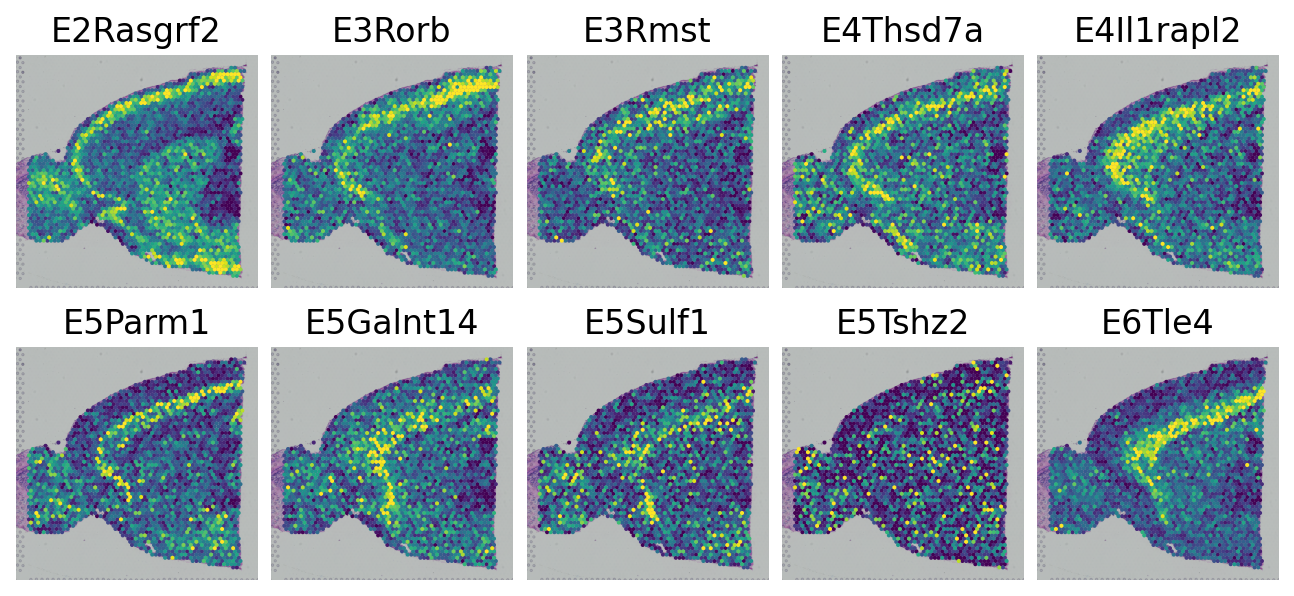

In [79]:
tg.project_cell_annotations(ad_map, adata_st, annotation="subclass_label")
annotation_list = ['E2Rasgrf2', 'E3Rorb','E3Rmst','E4Thsd7a','E4Il1rapl2','E5Parm1', 'E5Galnt14','E5Sulf1','E5Tshz2','E6Tle4']

sc.settings.set_figure_params(frameon=True, fontsize=15, facecolor='white', figsize=(2, 2)) #dpi=300, 
plot_cell_annotation_sc(adata_st, annotation_list,perc=0.02, spot_size= 150)

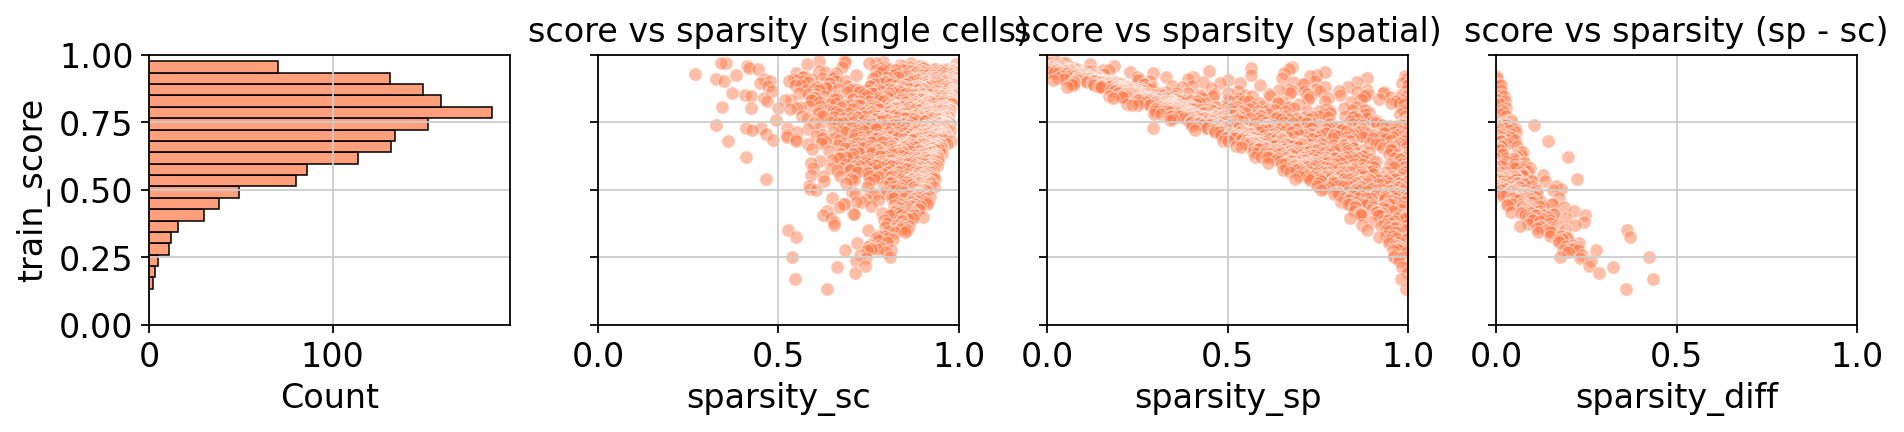

In [80]:
tg.plot_training_scores(ad_map, bins=20, alpha=.5)

In [35]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge

NameError: name 'adata_sc' is not defined

In [ ]:
ad_map